In [2]:
import pandas as pd
import json
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

with open('/home/monica/mp_new.json') as data_file:
   data = json.load(data_file)

/home/monica/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### What is the number of records?

In [3]:
num_records = len(data)
print("Number of records: {}".format(num_records))

Number of records: 306792


### What does each record look like?

In [4]:
print(data[0])

{'_id': {'$oid': '5b87bcabb56baf6f61c255b4'}, 'event': 'pageView', 'properties': {'city': 'Bengaluru', 'initial_referring_domain': 'www.youtube.com', 'screen_width': 1280, 'initial_referrer': 'https://www.youtube.com/', 'screen_height': 720, 'referrer': 'https://www.youtube.com/', 'region': 'Karnataka', 'mp_lib': 'web', 'utm_campaign': 'enrol-statistics-tutorial-FmWz4deqo9g_medium=VM', 'current_url': 'https://acadgild.com/big-data/deep-learning-course-training-certification?utm_campaign=enrol-statistics-tutorial-FmWz4deqo9g_medium=VM&utm_source=youtube', 'lib_version': '2.22.4', 'browser_version': 67, 'distinct_id': '16454a432b02ef-00fe07f10d6e26-47e1039-e1000-16454a432b238e', 'utm_source': 'youtube', 'time': 1530403204, 'mp_country_code': 'IN', 'referring_domain': 'www.youtube.com', 'os': 'Windows', 'browser': 'Chrome'}}


### What does 'id' field contain?

In [5]:
print(data[0]['_id'])

{'$oid': '5b87bcabb56baf6f61c255b4'}


### What does 'event' field contain?

In [6]:
print(data[0]['event'])

pageView


### What does 'properties' field contain?

In [7]:
print(data[0]['properties'])
print(len((data[0]['properties'].keys())))
print(data[0]['properties'].keys())
print('-'*100)
print(data[298994]['properties'].keys())
print('-'*100)

for i in range(len(data)):
    if(len(data[i]['properties'].keys()) > 23):
        print(i, len(data[i]['properties'].keys()))

{'city': 'Bengaluru', 'initial_referring_domain': 'www.youtube.com', 'screen_width': 1280, 'initial_referrer': 'https://www.youtube.com/', 'screen_height': 720, 'referrer': 'https://www.youtube.com/', 'region': 'Karnataka', 'mp_lib': 'web', 'utm_campaign': 'enrol-statistics-tutorial-FmWz4deqo9g_medium=VM', 'current_url': 'https://acadgild.com/big-data/deep-learning-course-training-certification?utm_campaign=enrol-statistics-tutorial-FmWz4deqo9g_medium=VM&utm_source=youtube', 'lib_version': '2.22.4', 'browser_version': 67, 'distinct_id': '16454a432b02ef-00fe07f10d6e26-47e1039-e1000-16454a432b238e', 'utm_source': 'youtube', 'time': 1530403204, 'mp_country_code': 'IN', 'referring_domain': 'www.youtube.com', 'os': 'Windows', 'browser': 'Chrome'}
19
dict_keys(['city', 'initial_referring_domain', 'screen_width', 'initial_referrer', 'screen_height', 'referrer', 'region', 'mp_lib', 'utm_campaign', 'current_url', 'lib_version', 'browser_version', 'distinct_id', 'utm_source', 'time', 'mp_country

### What are the unique events stored in the data?

In [8]:
events = []
for record in range(len(data)):
    if (data[record]['event'] not in events):
        events.append(data[record]['event'])
        
print(events)

['pageView', 'coursepage-navigator-curriculum', 'coursepage-navigator-coursecomparison', 'coursepage-navigator-whythiscourse', 'coursepage-navigator-acadgildexperience', 'course-page-download-syllabus-btn', 'coursepage-navigator-faqs', 'coursepage-navigator-courseoverview', 'coursepage-stickyform-enrollnow-btn', 'campaign_delivery']


### What are the properties of the lead being stored?

In [9]:
print(list(data[0]['properties'].keys()))

['city', 'initial_referring_domain', 'screen_width', 'initial_referrer', 'screen_height', 'referrer', 'region', 'mp_lib', 'utm_campaign', 'current_url', 'lib_version', 'browser_version', 'distinct_id', 'utm_source', 'time', 'mp_country_code', 'referring_domain', 'os', 'browser']


### Create a dataframe with relevant columns

In [ ]:
column_names = ['id', 'event', 'utm_content', 'browser_version', 'search_engine', 'city', \
                'initial_referring_domain', 'lib_version', 'utm_medium', 'browser', 'screen_width',\
                'initial_referrer', 'utm_campaign', 'time', 'current_url', 'distinct_id', 'utm_source',\
                'device', 'mp_country_code', 'referrer', 'region', 'mp_lib', 'mp_processing_time_ms', \
                'referring_domain', 'os', 'screen_height']

b_data = pd.DataFrame(columns = column_names)
    
b_data['id'] = pd.Series([data[x]['_id']['$oid'] for x in range(len(data))])
b_data['event'] = pd.Series([data[x]['event'] for x in range(len(data))])


#There may be missing fields for a record
for x in range(len(data)):
    for column in column_names[2:]:  
        #print(x, column)
        if (column in data[x]['properties'].keys()):
            b_data.iloc[x][column] = data[x]['properties'][column]
        
    #b_data[column] = pd.Series([data[x]['properties'][column] for x in range(len(data)) \
          #                      if column in data[x]['properties'].keys()])

  


### Getting number of unique values possible for Region, City, MP_Country_Code for Location information

In [ ]:
print(len(list(b_data['city'].unique())))
print(len(list(b_data['region'].unique())))
print(len(list(b_data['mp_country_code'].unique())))

In [ ]:
print(list(b_data['city'].unique()))
print("=" * 70)
print(list(b_data['region'].unique()))
print("=" * 70)
print(list(b_data['mp_country_code'].unique()))
print("=" * 70)

### Visualizing the distribution of browsers by Country

In [12]:
print(b_data[b_data['city'] == 'Ellenwood'])

                             id     event utm_content browser_version  \
7184   5b87bcb4b56baf6f61c271c4  pageView         NaN              60   
67154  5b87be1fb56baf6f61c35c06  pageView         NaN              67   

      search_engine       city initial_referring_domain lib_version  \
7184            NaN  Ellenwood          www.youtube.com      2.22.4   
67154        google  Ellenwood                   direct      2.22.4   

      utm_medium  browser      ...      utm_source device mp_country_code  \
7184          VM  Firefox      ...         youtube    NaN              US   
67154        NaN   Chrome      ...             NaN    NaN              US   

                       referrer   region mp_lib mp_processing_time_ms  \
7184   https://www.youtube.com/  Georgia    web                   NaN   
67154                       NaN  Georgia    web                   NaN   

      referring_domain       os screen_height  
7184   www.youtube.com  Windows           768  
67154             

In [1]:

India_data = b_data[b_data['mp_country_code'] == 'IN']

#print(len(list(India_data['city'].unique())))
#print("=" * 100)
#print(list(India_data['city'].unique()))
plt.figure(figsize=(20,10))
#f.groupby("Col2").filter(lambda x: len(x) >= 5) 
grouped_data = b_data['mp_country_code'].groupby([b_data['mp_country_code']]).count()
print(grouped_data)

#grouped_data = b_data.groupby('mp_country_code').filter(lambda x: len(x) >= 5)
grouped_data.plot(kind='bar')

NameError: name 'b_data' is not defined

In [14]:
US_data = b_data[b_data['mp_country_code'] == 'US']

print(len(list(US_data['city'].unique())))
print("="*100)
print(list(US_data['city'].unique()))


1083
['Seattle', 'San Diego', 'San Mateo', 'Fredericksburg', 'San Francisco', 'New Brunswick', 'New York', 'Brooklyn', 'Mountain View', 'Milpitas', 'Norcross', 'Alhambra', 'San Jose', 'Houston', 'Charlotte', 'Boynton Beach', 'Gaithersburg', 'Oklahoma City', 'Minnetonka', 'Lancaster', 'Columbus', 'Solon', 'Huntersville', 'Sacramento', nan, 'Irving', 'Aurora', 'Ames', 'North Richland Hills', 'Cupertino', 'Naperville', 'Fairfax', 'Bloomington', 'Collierville', 'Cumming', 'Memphis', 'Santa Clara', 'Atlanta', 'Dublin', 'Plano', 'Boston', 'Denver', 'Cementon', 'Ashburn', 'Mount Holly', 'Bellevue', 'Loma Linda', 'Fremont', 'St Louis', 'Palo Alto', 'Campbell', 'Phoenix', 'Dallas', 'Tempe', 'Chelmsford', 'Irvine', 'Woodhaven', 'Piscataway', 'Los Angeles', 'Cedar Park', 'Chicago', 'Pharr', 'Naples', 'Pleasanton', 'Portland', 'Hoboken', 'West Chester', 'Lowell', 'Philadelphia', 'Port Orange', 'Stone Mountain', 'Interlaken', 'Hanford', 'Madison', 'Oakland', 'Delray Beach', 'Chico', 'Toledo', 'Ches

In [15]:
data1=b_data[(b_data['mp_country_code'] != 'US') & (b_data['mp_country_code'] != 'IN') ]
print(len(list(data1['city'].unique())))
print("=" * 100)
print(list(data1['city'].unique()))

1395
['Singapore', 'Dubai', nan, 'Vienna', 'Colombo', 'Amman', 'Chichawatni', 'Kensington', 'Calgary', 'Lahore', 'Gatineau', 'Shah Alam', 'Yangon', 'Bedford', 'Cambridge', 'Codlea', 'Wolverhampton', 'Central', 'Paris', 'London', 'Mosonmagyaróvár', 'Douar Jdida', 'Riyadh', 'Toronto', 'Douar Tardane', 'Merrylands', 'Lagos', 'Brisbane', 'Ajax', 'Dammam', 'Tbilisi', 'Bristol', 'Puchong Batu Dua Belas', 'Pretoria', 'Kathmandu', 'Derby', 'Burwood', 'Tokyo', 'Vancouver', 'North York', 'Guayaquil', 'Markham', 'Muscat', 'Ipoh', 'Mississauga', 'Montreal', 'Hounslow', 'Surry Hills', 'Athens', 'Bikin', 'Nairobi', 'Copenhagen', 'Islamabad', 'Etobicoke', 'Almere Stad', 'Trujillo', 'Malé', 'Mira', 'Aurora', 'Croydon', 'Winnipeg', 'Karachi', 'Brampton', 'Edmonton', 'Walsall', 'Sora', 'Iași', 'Sharjah', 'Stoke Newington', 'Heuchelheim', 'Wolfsburg', 'Walthamstow', 'Benin City', 'Casablanca', 'San Juan', 'Hendra', 'Amsterdam', 'Poelten', 'Sulaymaniyah', 'Johor Bahru', 'Saitama', 'Milton', 'Saint Lucia',

### Visualizing the distribution of Current_URL of browsers.

['enrol-statistics-tutorial-FmWz4deqo9g_medium=VM', 'FB_AG_Fullstack_IN_WC_traffic_ad', 'fulllstack_search', 'btm_display_2306?aff_id=5077', 'AG_FB_NC_IN_WC_BigData_lookalike_mobile_2girl', 'Data_Science', 'DataAnalytics_1152', 'bigdata_lowintent_ind_0905', 'AG_FB_WC_LI_IN_Android_Ad', 'data_analytics_adcanopus_Dec', 'AG_FB_NC_IN_WC_DataScience_25-45_alldivices_lp_video', 'datascience_us_0904', 'AG_FB_TTL_BigData', 'ag_bd_1904', 'android_lowintent_fb?aff_id=5074', 'Seminar_Marathahalli_7_Jul', 'youtube_channel', 'AG_FB_NC_IN_WC_DataR_alldevices_lookalike', 'FB AG TTL campaign', 'AG_FB_TTL_US_Fullstack', 'bigdata_adcanopus_Dec', 'DataScienceMay', 'DataScienceJune', 'ag_da_1904', 'marathalli_display_2306?aff_id=5077', 'ag_main_lp', 'android_lowintent', 'BigdataMay', 'ds_bootcamp_mktg_1905', 'DS_Discount', 'ag_lowintent_brand', 'webinar_LP', 'btm_display_2306', 'AG_FB_TTL_Data_analytics_for_managers', 'DataScience', 'ag_g_display_devops_cp', 'BigdataJune', 'ag_g_brand_home', 'AG_FB_NC_IN_

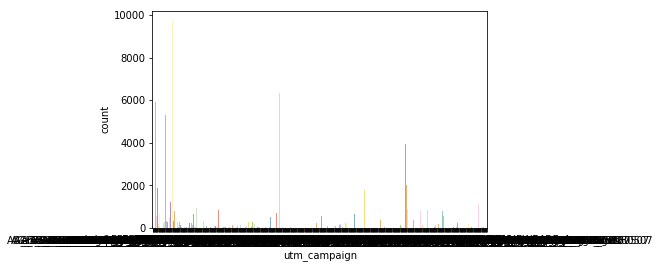

In [16]:
print(list(b_data['utm_campaign'].unique()))
sns.countplot(x="utm_campaign", data=b_data, palette="Set3")

In [17]:
#b_data['utm_campaign'] = b_data['utm_campaign'].str.lower()

android_records = b_data[(b_data["utm_campaign"].str.contains('android',na=False))]

print(list(android_records['utm_campaign'].unique()))

print(android_records.count())

android_records['utm_campaign'].replace('.*android.*', 'Android', regex=True, inplace=True,)
print(list(android_records['utm_campaign'].unique()))
print(android_records.count())

['android_lowintent_fb?aff_id=5074', 'android_lowintent', 'android_display', 'enrol-android-interview-questions-part1-tQDEgTdDmKc_medium=VM', 'android_adcanopus_Dec', 'enrol-android-interview-questions-part3-4B_HLt4tDAk_medium=VM', 'enrol-android-interview-questions-part2-tQDEgTdDmKc_medium=VM', 'android_lowintent_fb', 'ag_g_display_android_ind', 'enrol-android-interview-questions-part6-2ISikgzd-lI_medium=VM', 'M_38-55_android_acadgildjunior1', 'enrol-android-interview-questions-part4-zTy_ImwjQ1E_medium=VM', 'android_email', 'enrol-android-interview-questions-part5-qvmTcaNIVVs_medium=VM', 'M_34-52_android_acadgildjunior1_bnglore', 'FB_AG_android_TTL']
id                          712
event                       712
city                        712
initial_referring_domain    712
initial_referrer            712
referrer                    712
region                      712
utm_campaign                712
current_url                 712
browser_version             696
utm_source          

/home/monica/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
'''
b_data['utm_campaign'].replace('.*android.*', 'Android', regex=True, inplace=True)
b_data['utm_campaign'].replace('.*statistics.*', 'Statistics', regex=True, inplace=True)
b_data['utm_campaign'].replace('.*fullstack.*', 'Fullstack', regex=True, inplace=True)
b_data['utm_campaign'].replace('.*bigData.*', 'BigData', regex=True, inplace=True)

b_data['utm_campaign'].replace('.*dataanalytics.*', 'DataAnalytics', regex=True, inplace=True)
b_data['utm_campaign'].replace('.*data_analytics.*', 'DataAnalytics', regex=True, inplace=True)
b_data['utm_campaign'].replace('.*data_science.*', 'DataScience', regex=True, inplace=True)
b_data['utm_campaign'].replace('.*bigData.*', 'BigData', regex=True, inplace=True)
'''

"\nb_data['utm_campaign'].replace('.*android.*', 'Android', regex=True, inplace=True)\nb_data['utm_campaign'].replace('.*statistics.*', 'Statistics', regex=True, inplace=True)\nb_data['utm_campaign'].replace('.*fullstack.*', 'Fullstack', regex=True, inplace=True)\nb_data['utm_campaign'].replace('.*bigData.*', 'BigData', regex=True, inplace=True)\n\nb_data['utm_campaign'].replace('.*dataanalytics.*', 'DataAnalytics', regex=True, inplace=True)\nb_data['utm_campaign'].replace('.*data_analytics.*', 'DataAnalytics', regex=True, inplace=True)\nb_data['utm_campaign'].replace('.*data_science.*', 'DataScience', regex=True, inplace=True)\nb_data['utm_campaign'].replace('.*bigData.*', 'BigData', regex=True, inplace=True)\n"

In [ ]:
'''
ds_cnt = b_data[(b_data["utm_campaign"].str.contains('datascience',na=False))].count()
print(ds_cnt)
ds_cnt1 = b_data[(b_data["utm_campaign"].str.contains('data_science',na=False))].count()
print(ds_cnt1)
#regex_pat = re.compile(r'data_science', flags=re.IGNORECASE)
#b_data['utm_campaign'].str.replace(regex_pat, 'datascience')
#print(b_data[b_data['utm_campaign'] == 'datascience'].count())
'''

In [ ]:
print(len(list(b_data['utm_source'].unique())))
print(list(b_data['utm_source'].unique()))

In [ ]:
fig = plt.gcf()
fig.set_size_inches(50,10) 

sources = list(b_data['utm_source'].unique())
source_freq = [b_data[b_data['utm_source'] == s].shape[0] for s in sources]

s1 = []
s_f1 = []

for i in range(len(sources)):
    if(source_freq[i] > 20):
        s1.append(sources[i])
        s_f1.append(source_freq[i])

print(len(s1))
print(len(s_f1))


# Plot
#plt.pie(s_f1, labels=s1, autopct='%1.1f%%', startangle=30)
 
#plt.axis('equal')
plt.bar(s1, s_f1)
plt.show()

In [ ]:
print(list(b_data['current_url'].unique())[:10])